In [6]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread('assets/Imagem_Simples.jpg')

Q1 (0, 0, 576, 360)
Q2 (576, 0, 1152, 360)
Q3 (0, 360, 576, 720)
Q4 (576, 360, 1152, 720)


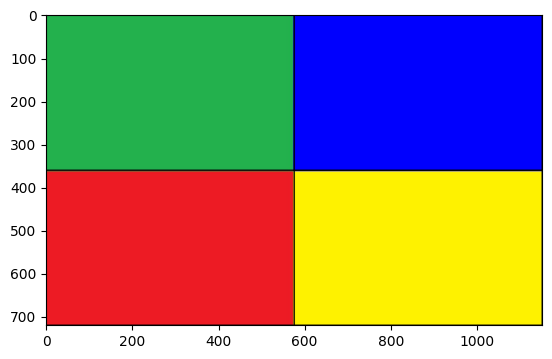

In [19]:
#divide the img image array into 4 quadrants, get the quadrants coordinates and store them in a dictionary
quadrants = {}

quadrants['Q1'] = (0, 0, img.shape[1]//2, img.shape[0]//2)
quadrants['Q2'] = (img.shape[1]//2, 0, img.shape[1], img.shape[0]//2)
quadrants['Q3'] = (0, img.shape[0]//2, img.shape[1]//2, img.shape[0])
quadrants['Q4'] = (img.shape[1]//2, img.shape[0]//2, img.shape[1], img.shape[0])


#iterate over the quadrants and draw a rectangle around them
for key, value in quadrants.items():
    print(key, value)
    cv2.rectangle(img, (value[0], value[1]), (value[2], value[3]), (0, 0, 0), 2)
    


#show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:

# Initialize the GeoJSON
geojson = {
    "type": "FeatureCollection",
    "features": []
}
count = 0
#resize image, 100x100
#save image resized 
count = 0

values = {"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4}

# Iterate over the numpy array in chunks of region_size
for region_key in quadrants.keys():
        # Calculate the average grayscale value in this region



        polygon = {
            "type": "Polygon",
            "coordinates": [[
                [float(quadrants[region_key][0]), float(quadrants[region_key][1])],
                [float(quadrants[region_key][2]), float(quadrants[region_key][1])],
                [float(quadrants[region_key][2]), float(quadrants[region_key][3])],
                [float(quadrants[region_key][0]), float(quadrants[region_key][3])],
                [float(quadrants[region_key][0]), float(quadrants[region_key][1])]
            ]]
        }

        # Create a feature for this region
        feature = {
            "type": "Feature",
            "geometry": polygon,
            "id": count,
            "properties": {
                "power": values[region_key],
                "region_name": f"region_{region_key}"
            }
        }
        count += 1

        # Add the feature to the GeoJSON
        geojson["features"].append(feature)

In [4]:
import cv2
import numpy as np
import os 


# Read the image
# image = cv2.imread('assets/Imagem_Simples.jpg')
image = cv2.imread('girl.jpg')

os.makedirs('assets/filtros', exist_ok=True)

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel filter
sobelx = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
#save image at filtros 
cv2.imwrite('assets/filtros/sobelx.jpg', sobelx)

sobely = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
#save image at filtros
cv2.imwrite('assets/filtros/sobely.jpg', sobely)

sobel = np.hypot(sobelx, sobely)

#save image at filtros
cv2.imwrite('assets/filtros/sobel.jpg', sobel)


#save the image
count = 0
# Apply a smoothing filter
BLUR_RADIUS = 3  
smoothed_image = cv2.blur(sobel, (BLUR_RADIUS, BLUR_RADIUS))
#save the image
print(smoothed_image.shape)
cv2.imwrite('assets/filtros/smoothed_image.jpg', smoothed_image)

smoothed_image = cv2.resize(smoothed_image, (0, 0), fx=0.3, fy=0.3)
grayscale_image = cv2.resize(grayscale_image, (0, 0), fx=0.3, fy=0.3)
print(smoothed_image.shape)

#save the image
cv2.imwrite('assets/smoothed_image.jpg', smoothed_image)

# Initialize the GeoJSON
geojson = {
    "type": "FeatureCollection",
    "features": []
}

gr_values = []

values = []

REGION_SIZE = 8  # Set this to the desired region size

# Iterate over the numpy array in chunks of region_size
for row in range(0, smoothed_image.shape[0], REGION_SIZE):
    for col in range(0, smoothed_image.shape[1], REGION_SIZE):
        # Calculate the average grayscale value in this region
        # region = smoothed_image[row:row+REGION_SIZE, col:col+REGION_SIZE]
        region = grayscale_image[row:row+REGION_SIZE, col:col+REGION_SIZE]
        gr_value = np.mean(region)
        gr_values.append(gr_value)

        values.append(gr_value)
        

        # Create a polygon for this region
        polygon = {
            "type": "Polygon",
            "coordinates": [[
                [float(col), float(row)],
                [float(col + REGION_SIZE), float(row)],
                [float(col + REGION_SIZE), float(row + REGION_SIZE)],
                [float(col), float(row + REGION_SIZE)],
                [float(col), float(row)]
            ]]
        }

        # Create a feature for this region
        feature = {
            "type": "Feature",
            "geometry": polygon,
            "id": row // REGION_SIZE * smoothed_image.shape[1] // REGION_SIZE + col // REGION_SIZE,
            "properties": {
                "gradient_value": gr_value,
                "region_name": f"region_{count}"
            }
        }
        count += 1
        # Add the feature to the GeoJSON
        geojson["features"].append(feature)

#save json
import json
with open('assets/geojson.json', 'w') as f:
    json.dump(geojson, f)


#run the shell command "$ cartogram -p geojson.json "
# os.system('cartogram -p assets/geojson.json > region_name ')

(947, 800)
(284, 240)


In [2]:
print(len(gr_values), len(geojson['features']))

1080 1080


In [3]:
non_zero_gr_values =[x for x in gr_values if x > 0]
mean = np.mean(non_zero_gr_values)
mean

68.291796875

## populate density (execute cartogram algorithm)

In [7]:
# Load the CSV file into a DataFrame
df = pd.read_csv('assets/geojson_data.csv')
print(len(df))
print(len(gr_values))

# Initialize the count for the region name
# count = 0
df["Region Data"] = values
# df


# df["Region Data"].iloc[96] = 6

# df["Region Data"] = gr_values
# #put the mean of non zero values in the region data
# df["Region Data"] = df["Region Data"].replace(0, mean)



#edit the csv file 

#save df 
df.to_csv('assets/geojson_data.csv', index=False)

1080
1080
